# Stroke prediction

## Definição do problema

Análise exploratória do dataset contendo informações médicas e condições de pacientes em que alguns sofreram AVC. Iremos verificar o dataset a fim de relacionar tais condições com a possibilidade do paciente sofre um derrame cerebral.

## Coleta de dados

cerebral stroke prediction based on imbalanced medical dataset

 [Data for: A hybrid machine learning approach to cerebral stroke prediction based on imbalanced medical-datasets](https://data.mendeley.com/datasets/x8ygrw87jw/1)

## Importando as bibliotecas

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Carregando o dataset

In [35]:
df = pd.read_csv('../data/dataset.csv')
print(df.shape)
df.head()

(43400, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## Limpeza da base

In [36]:
df['id'].nunique()

43400

Não há duplicações nos registros, então podemos dropar a coluna, já que não trás nenhuma informação nova

In [37]:
df.drop(columns=['id'], inplace=True) # dropando coluna id

print(df.shape)
df.head()

(43400, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  int64  
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  int64  
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  int64  
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                43400 non-null  float64
 9   smoking_status     43400 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 3.6+ MB


O dataset contém 43k+ informações médicas de pacientes identificados por Id. 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


Quantos destes valores são de stroke(avc) percentualmente?

In [40]:
df['stroke'].sum()/df.shape[0] * 100

1.804147465437788

O dataset contém algumas colunas com itens objeto, para fins de classificação devemos transformar em tipo numérico. Itens nulos nas colunas bmi e smoking_status. Iremos verificar por valores unicos e quais são estes valores

In [41]:
df.nunique()

gender                   3
age                    104
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    12543
bmi                    555
smoking_status           3
stroke                   2
dtype: int64

In [42]:
for cols in df.columns:
    if df[cols].nunique() >= 2 and df[cols].nunique() < 10 :
        print(cols,df[cols].unique())


gender ['Male' 'Female' 'Other']
hypertension [0 1]
heart_disease [0 1]
ever_married ['No' 'Yes']
work_type ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Residence_type ['Rural' 'Urban']
smoking_status [nan 'never smoked' 'formerly smoked' 'smokes']
stroke [0 1]


Mapeando os valores do tipo objeto com valores numericos

In [43]:
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})
df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})
df['Residence_type'] = df['Residence_type'].replace({'Rural': 0, 'Urban': 1})

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,0,0,children,0,95.12,18.0,NaN,0
1,0,58.0,1,0,1,Private,1,87.96,39.2,never smoked,0
2,1,8.0,0,0,0,Private,1,110.89,17.6,NaN,0
3,1,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked,0
4,0,14.0,0,0,0,Never_worked,0,161.28,19.1,NaN,0


In [44]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,0.591866,42.217894,0.093571,0.047512,0.643733,0.501290,104.482750,28.605038,0.018041
std,0.492009,22.519649,0.291235,0.212733,0.478901,0.500004,43.111751,7.770020,0.133103
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,1.000000,44.000000,0.000000,0.000000,1.000000,1.000000,91.580000,27.700000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,1.000000,112.070000,32.900000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,1.000000,291.050000,97.600000,1.000000


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'ever_married'}>,
        <AxesSubplot:title={'center':'Residence_type'}>],
       [<AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

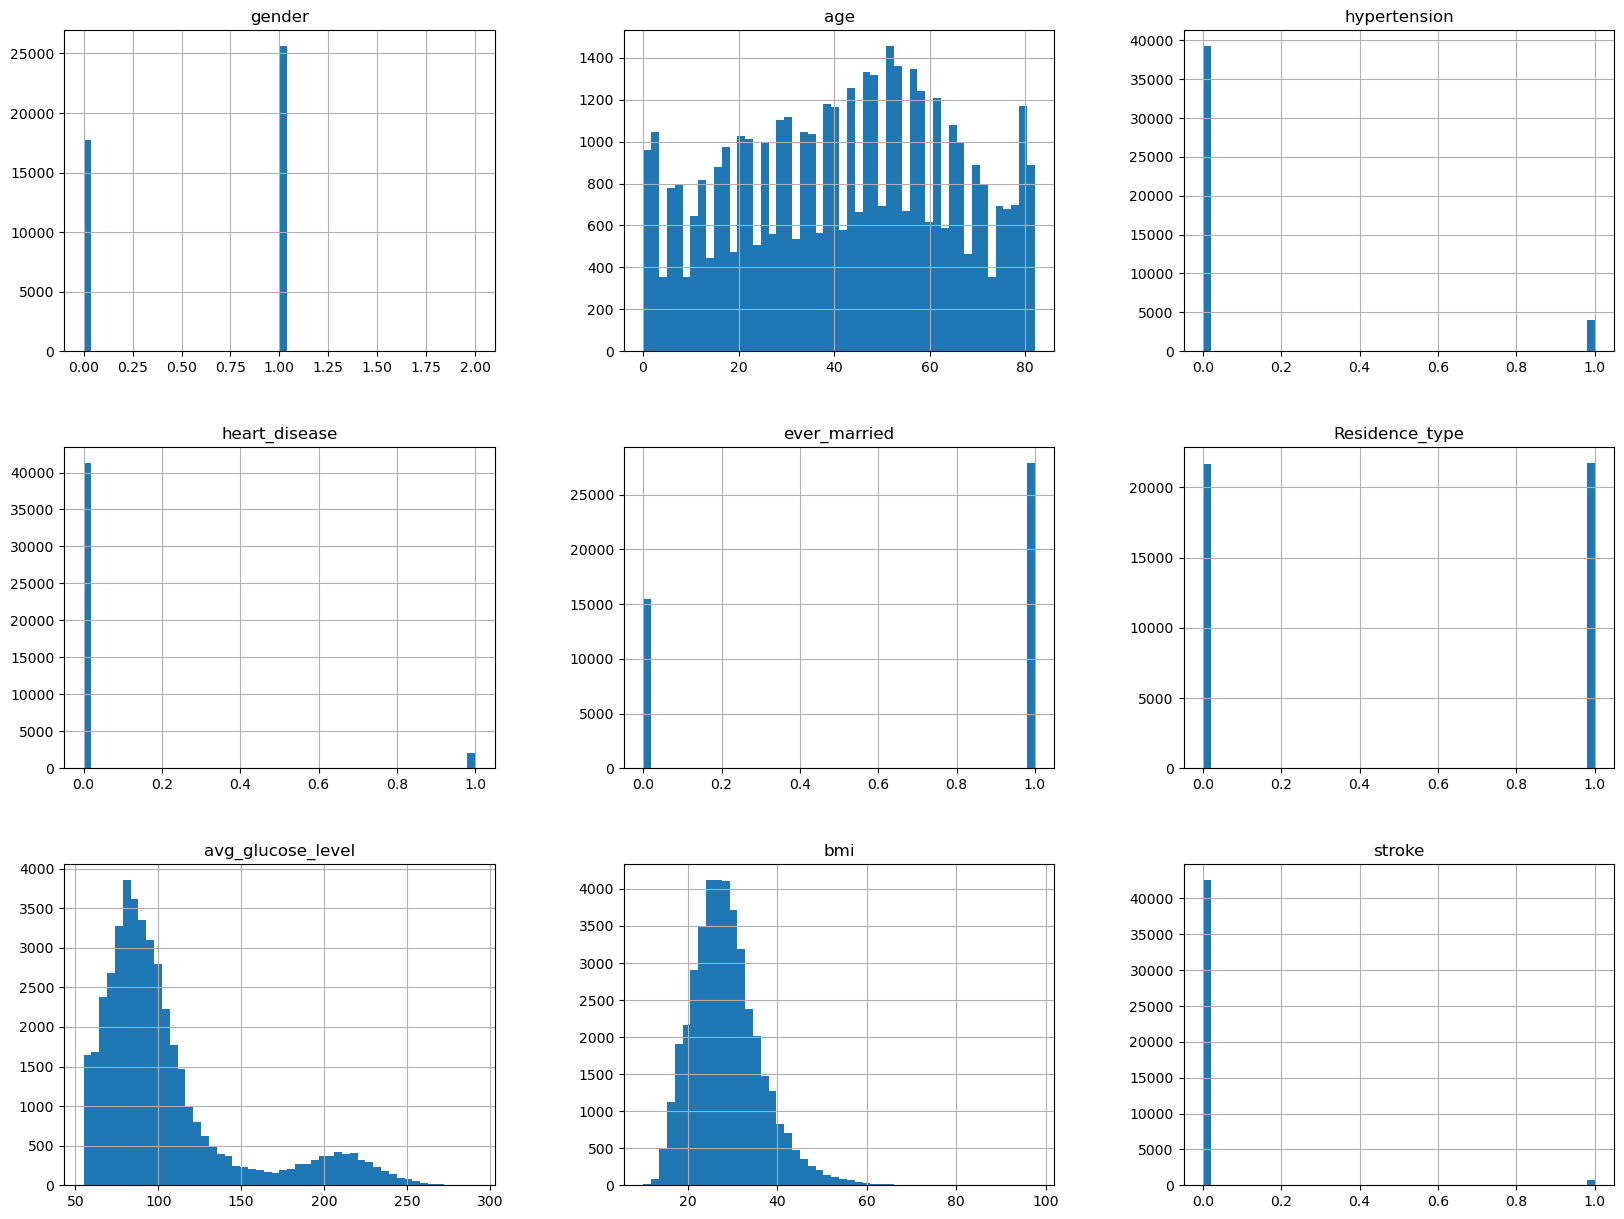

In [45]:
df.hist(bins=50, figsize=(20,15))

verificando a porcentagem de valores nulos nas colunas

In [46]:
missing_perc = (df.isnull().sum()/ df.shape[0])*100
missing_perc

gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

Substituimos os valores nulos de smoking_status pela moda dos valores não nulos

In [47]:
mode_smoking = df['smoking_status'].mode()[0]
df['smoking_status'].fillna(mode_smoking, inplace=True)

Iremos trocar os valores de bmi pela moda

In [48]:
mode_bmi = df['bmi'].mode()[0]
df['bmi'].fillna(mode_bmi, inplace=True)

Verificamos se há valores nulos

In [49]:
missing_perc = (df.isnull().sum()/ df.shape[0])*100
missing_perc

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'ever_married'}>,
        <AxesSubplot:title={'center':'Residence_type'}>],
       [<AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

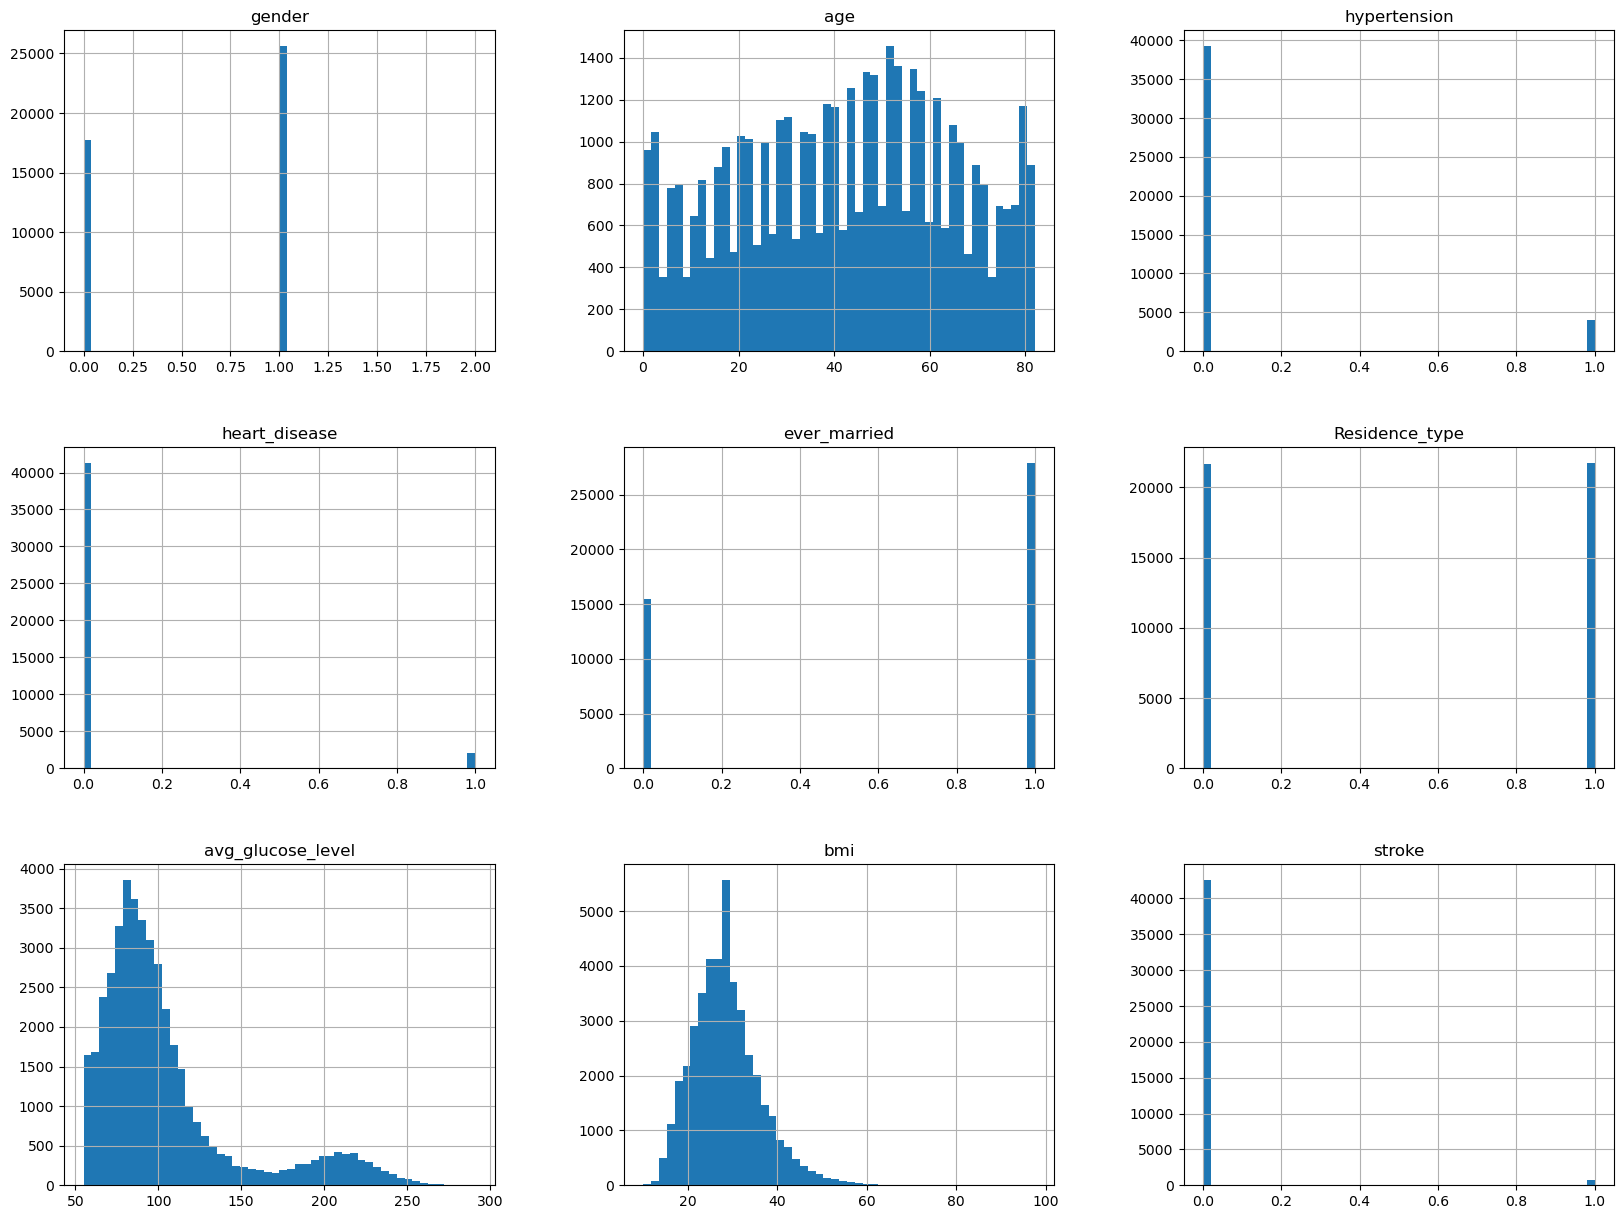

In [50]:
df.hist(bins=50, figsize=(20,15))

verificamos que o histograma da idade está confuso. Para verificar.


<AxesSubplot:>

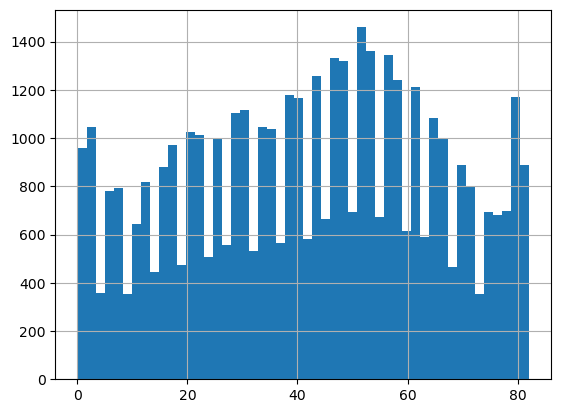

In [51]:
df['age'].hist(bins = 50)

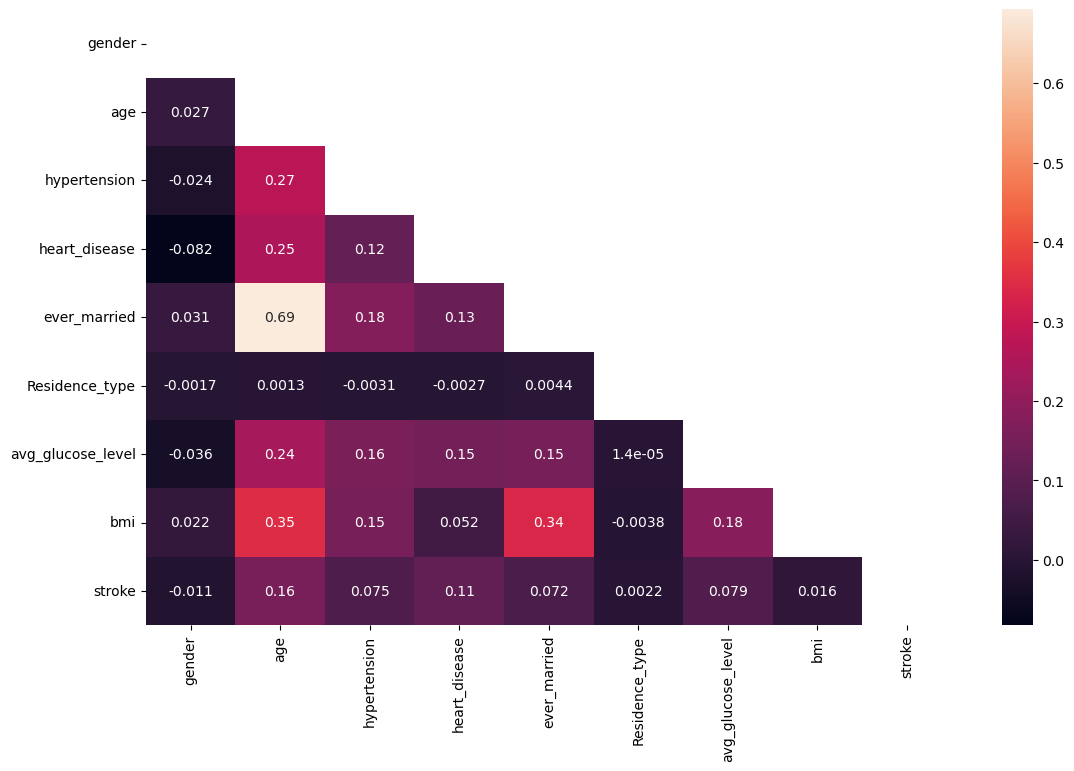

In [52]:
plt.figure(figsize=(13, 8))
corr= df.corr()

# Plot do triangulo superior da matriz de correlação
matrix = np.triu(corr)

# usando a matriz superior como uma mascara
sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

O mapa mostra uma alta correlação entre idade e casamento

In [53]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

In [54]:
y.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

<AxesSubplot:ylabel='stroke'>

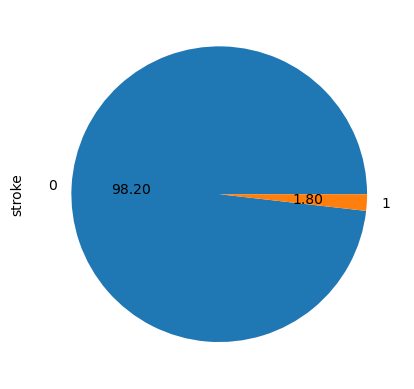

In [55]:
y.value_counts().plot.pie(autopct='%.2f')